In [1]:
import numpy as np 
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC

print(os.listdir("C:/Users/bhupe/Desktop/My Project"))
dim = 100

['.ipynb_checkpoints', '3.Fruit_image_classification', '4.Car_number_plate', '5.Food_Recognition', 'car_bicycle', 'Food_Recognition', 'Gender Classification', 'Linear Regression', 'Mask-Detector', 'Untitled.ipynb']


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
def getYourFoods(foods, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['training', 'testing']
    if not k_fold:
        path = "C:/Users/bhupe/Desktop/My Project/*/Food Dataset/" + data_type + "/"
        for i,f in enumerate(foods):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), " images of " , foods[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "C:/Users/bhupe/Desktop/My Project/*/Food Dataset/" + v + "/"
            for i,f in enumerate(foods):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels

In [6]:
def getAllFoods():
    foods = []
    for food_path in glob.glob("C:/Users/bhupe/Desktop/My Project/*/Food Dataset/training/*"):
        food = food_path.split("/")[-1]
        foods.append(food)
    return foods

In [7]:
getAllFoods()

['My Project\\5.Food_Recognition\\Food Dataset\\training\\Bread',
 'My Project\\5.Food_Recognition\\Food Dataset\\training\\Dairy product',
 'My Project\\5.Food_Recognition\\Food Dataset\\training\\Dessert',
 'My Project\\5.Food_Recognition\\Food Dataset\\training\\Egg',
 'My Project\\5.Food_Recognition\\Food Dataset\\training\\Fried food',
 'My Project\\5.Food_Recognition\\Food Dataset\\training\\Meat',
 'My Project\\5.Food_Recognition\\Food Dataset\\training\\Noodles-Pasta',
 'My Project\\5.Food_Recognition\\Food Dataset\\training\\Rice',
 'My Project\\5.Food_Recognition\\Food Dataset\\training\\Seafood',
 'My Project\\5.Food_Recognition\\Food Dataset\\training\\Soup',
 'My Project\\5.Food_Recognition\\Food Dataset\\training\\Vegetable-Fruit']

In [24]:
#Choose your Foods
foods = ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Rice', 'Soup'] #Binary classification

#Get Images and Labels 
X_t, y_train =  getYourFoods(foods, 'training', print_n=True, k_fold=False)
X_test, y_test = getYourFoods(foods, 'testing', print_n=True, k_fold=False)

#Scale Data Images
#flatten the pixels to a single row for each image and constructed a matrix with flattened pixels rows
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

There are  401   TRAINING  images of  BREAD
There are  429   TRAINING  images of  DAIRY PRODUCT
There are  401   TRAINING  images of  DESSERT
There are  401   TRAINING  images of  EGG
There are  401   TRAINING  images of  FRIED FOOD
There are  280   TRAINING  images of  RICE
There are  401   TRAINING  images of  SOUP
There are  101   TESTING  images of  BREAD
There are  101   TESTING  images of  DAIRY PRODUCT
There are  101   TESTING  images of  DESSERT
There are  101   TESTING  images of  EGG
There are  101   TESTING  images of  FRIED FOOD
There are  96   TESTING  images of  RICE
There are  101   TESTING  images of  SOUP


In [25]:
def plot_image_grid(images, rows, columns):
    figure = plt.figure(figsize=(columns * 3, rows * 3))
    for i in range(columns * rows):
        figure.add_subplot(rows, columns, i + 1)
        plt.imshow(images[i])
    plt.show()

In [26]:
type(X_train)

numpy.ndarray

In [27]:
X_t[445:470]

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

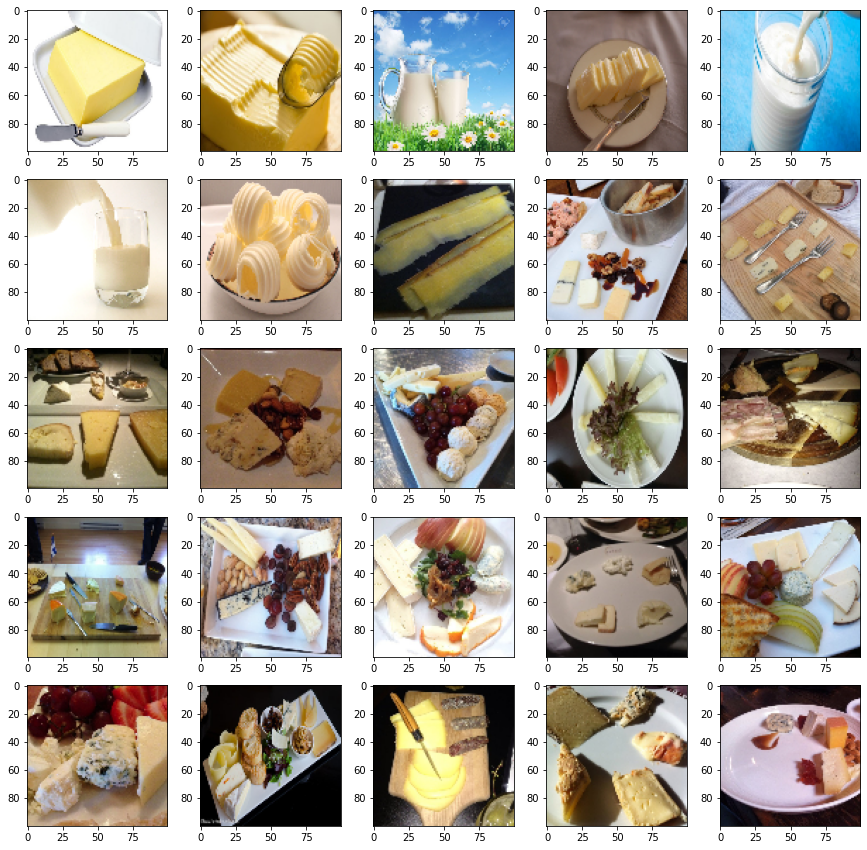

In [28]:
#Slicing a 1D npy array:
#The slice notation specifies a start and end value [start:end] and copies the list from start up to but not including end.
plot_image_grid(X_t[445:470], 5, 5)

In [30]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(foods))
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
len(y_train)

2714

In [33]:
len(X_train)

2714

In [34]:
X_t.shape

(2714, 100, 100, 3)

In [38]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
85/85 [==============================] - 2s 29ms/step - loss: 0.5857 - accuracy: 0.9503
Epoch 2/10
85/85 [==============================] - 3s 30ms/step - loss: 0.6531 - accuracy: 0.9396
Epoch 3/10
85/85 [==============================] - 3s 30ms/step - loss: 0.5185 - accuracy: 0.9536
Epoch 4/10
85/85 [==============================] - 2s 28ms/step - loss: 0.6891 - accuracy: 0.9480
Epoch 5/10
85/85 [==============================] - 3s 31ms/step - loss: 0.3881 - accuracy: 0.9668
Epoch 6/10
85/85 [==============================] - 3s 32ms/step - loss: 0.2266 - accuracy: 0.9768 
Epoch 7/10
85/85 [==============================] - 3s 31ms/step - loss: 0.4384 - accuracy: 0.9646
Epoch 8/10
85/85 [==============================] - 3s 30ms/step - loss: 0.3468 - accuracy: 0.9668
Epoch 9/10
85/85 [==============================] - 2s 29ms/step - loss: 0.3235 - accuracy: 0.9654
Epoch 10/10
85/85 [==============================] - 2s 29ms/step - loss: 0.3625 - accuracy: 0.9657


In [39]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

22/22 - 0s - loss: 34.4137 - accuracy: 0.2849

Test accuracy: 0.2849002778530121


In [40]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [41]:
predictions = probability_model.predict(X_test)

In [42]:
predictions[0]

array([6.9036540e-26, 0.0000000e+00, 7.1516520e-28, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 3.6951985e-36], dtype=float32)

In [43]:
#show the label that model has the highest confidence
np.argmax(predictions[0])

4

In [44]:
#corresbond test set label
y_test[0]

0

In [52]:
# write a function to match the actual test image with the predicted label. Show blue if correctly predicted.
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% \n({})".format(foods[predicted_label],
                                100*np.max(predictions_array),
                                foods[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(7))
    plt.yticks([])
    thisplot = plt.bar(range(7), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [53]:
X_test, y_test = getYourFoods(foods, 'testing', print_n=True, k_fold=False)

There are  101   TESTING  images of  BREAD
There are  101   TESTING  images of  DAIRY PRODUCT
There are  101   TESTING  images of  DESSERT
There are  101   TESTING  images of  EGG
There are  101   TESTING  images of  FRIED FOOD
There are  96   TESTING  images of  RICE
There are  101   TESTING  images of  SOUP


In [54]:
len(X_test)

702

In [55]:
predictions

array([[6.90365397e-26, 0.00000000e+00, 7.15165196e-28, ...,
        1.00000000e+00, 0.00000000e+00, 3.69519849e-36],
       [2.99040815e-14, 1.00000000e+00, 3.95108876e-11, ...,
        0.00000000e+00, 3.87007864e-31, 9.80558931e-35],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.14599903e-26, 5.46087468e-30, 1.00410081e-24],
       ...,
       [1.35362220e-22, 4.28407088e-09, 2.03114698e-08, ...,
        1.02629116e-07, 3.21104876e-18, 9.99999881e-01],
       [1.18014639e-34, 0.00000000e+00, 7.89354566e-32, ...,
        8.62993836e-01, 0.00000000e+00, 1.37006178e-01],
       [0.00000000e+00, 0.00000000e+00, 6.24170583e-14, ...,
        1.88915571e-25, 0.00000000e+00, 1.00000000e+00]], dtype=float32)

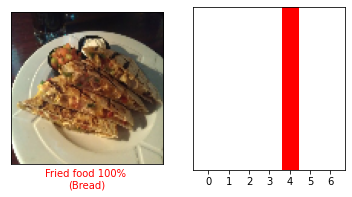

In [63]:
i = 30
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test)
plt.show()

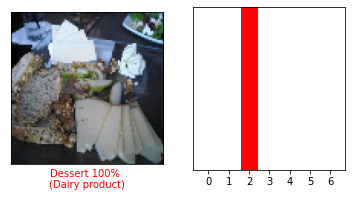

In [65]:
i = 129
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [66]:
from sklearn.utils import shuffle
X_shuffled,y_shuffled,predictions_shuffled = shuffle(X_test, y_test,predictions, random_state=0)

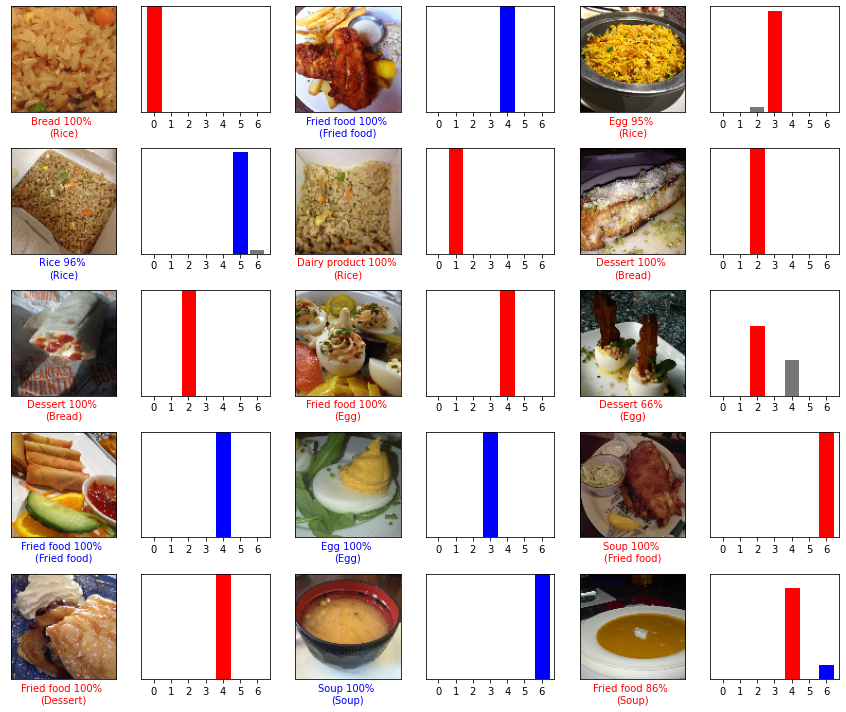

In [67]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_shuffled[i], y_shuffled, X_shuffled)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_shuffled[i], y_shuffled)
plt.tight_layout()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

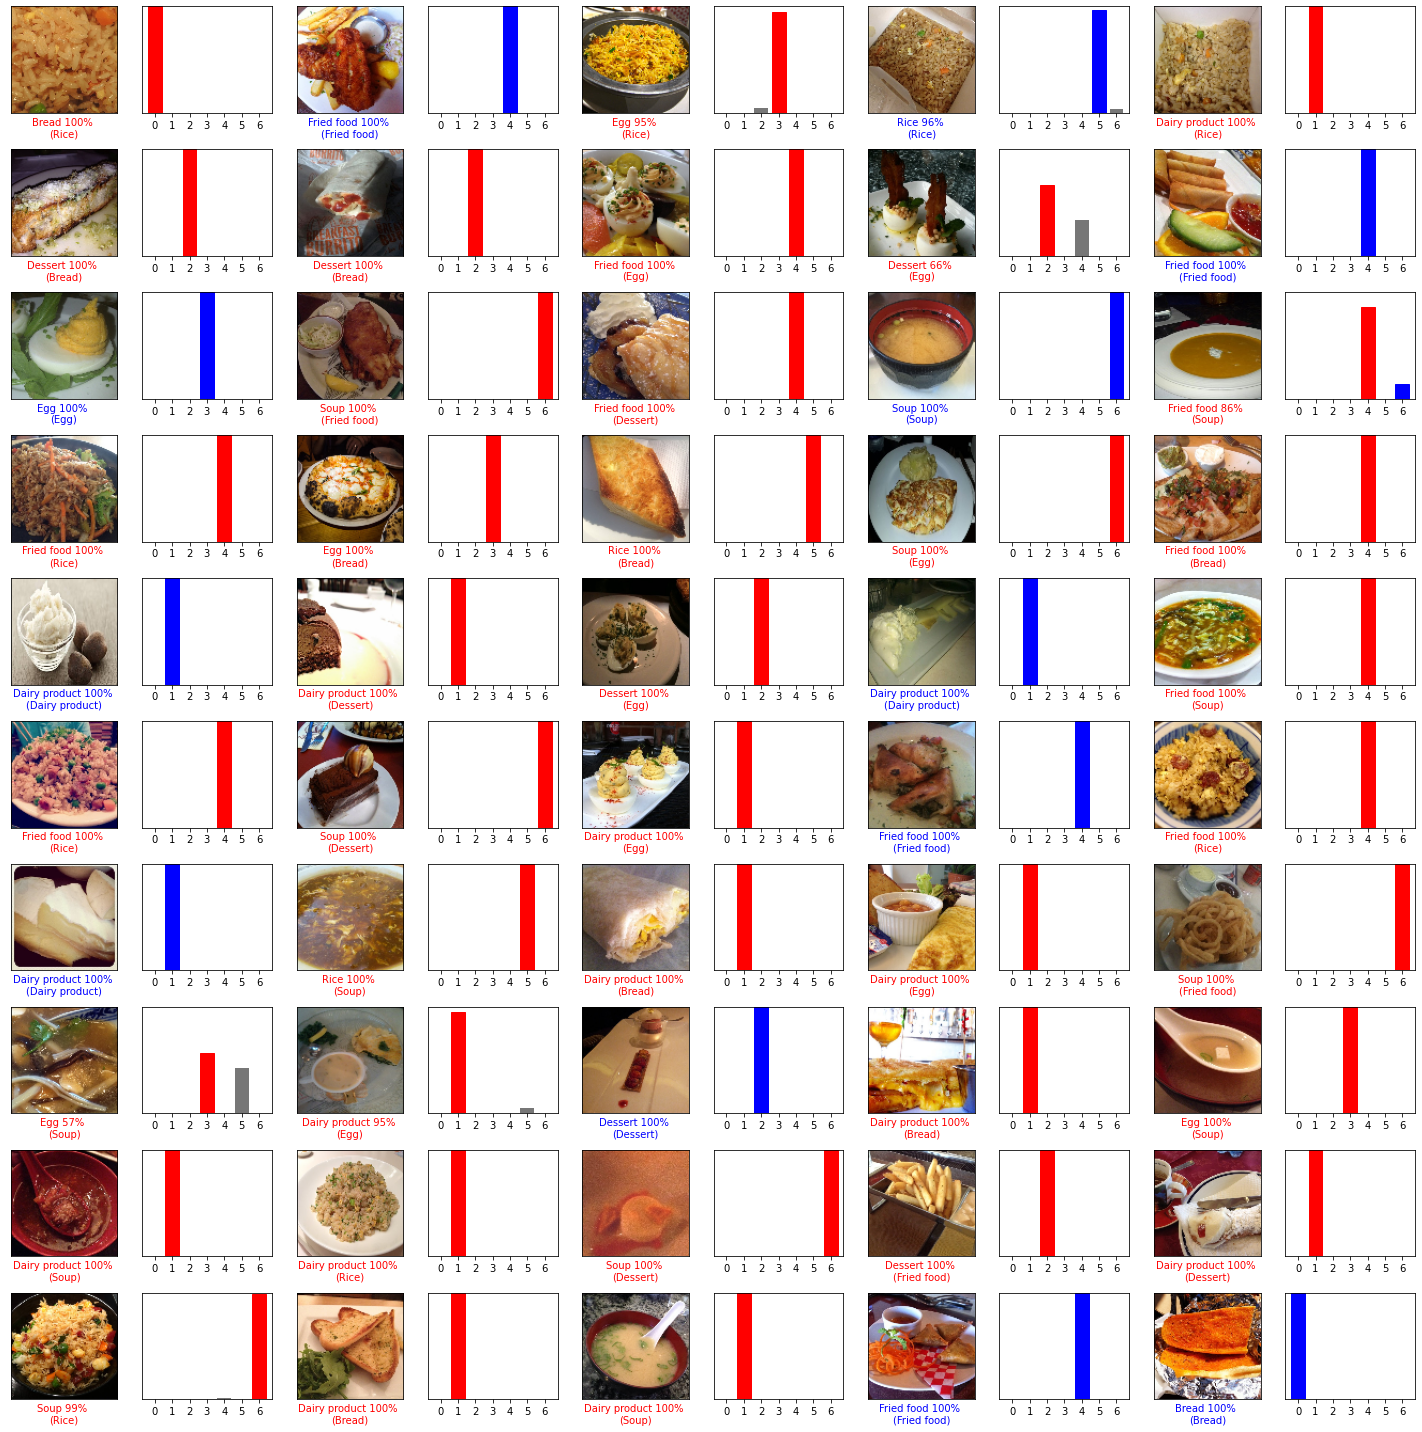

In [68]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_shuffled[i], y_shuffled, X_shuffled)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_shuffled[i], y_shuffled)
plt.tight_layout()
plt.savefig('test1.png', bbox_inches='tight')
plt.show()